<a href="https://colab.research.google.com/github/AngZiqi/ACTH2025/blob/main/Week7_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning in the Humanities

Machine Learning (ML) is a field of computer science that enables computers to learn patterns from data and make **predictions** or decisions without being explicitly programmed for each task. **The results are estimations, we can rarely completely rely on them 100%.**

In the humanities, ML can help us:
- Group artworks by stylistic similarities
- Discover hidden themes or topics in text
- Classify objects based on metadata
- Generate recommendations or analogies

We will first explore three text ML tasks using the MET Open Access dataset:
1. **Text Classification**
2. **Clustering**
3. **Topic Modeling**

## Key Concepts

### Training, Validation, and Test Sets
- **Training Set**: Used to train the model (learn patterns)
- **Validation Set**: (optional) Tune model parameters
- **Test Set**: Evaluate model on unseen data

### Evaluation Metrics
- **Accuracy**: % of correct predictions
- **Precision/Recall/F1**: We know the formulas
- **Confusion Matrix**: Breakdown of true vs. predicted classes

### Supervised vs. Unsupervised Learning
- **Supervised Learning**: Learn from labeled data (e.g., classify artwork type from description)
- **Unsupervised Learning**: Find structure in unlabeled data (e.g., group similar descriptions)


We will use the following Python libraries:

- **pandas**: you know
- **scikit-learn** (`sklearn`): Machine learning tools
- **nltk** or **spaCy**: Text preprocessing
- **matplotlib / seaborn**: Visualization

In [4]:
# Install required libraries (if needed)
#!pip install pandas scikit-learn matplotlib seaborn nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, NMF

import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import pandas as pd

df_filt15k = pd.read_csv("https://raw.githubusercontent.com/ACTH-DKES/ACTH2025/refs/heads/main/week7/filteredCleveland15k.csv")

df_filt15k = df_filt15k.drop(columns=['Unnamed: 0'])

In [8]:
df_filt15k.columns

Index(['id', 'accession_number', 'share_license_status', 'tombstone',
       'current_location', 'title', 'title_in_original_language', 'series',
       'series_in_original_language', 'creation_date',
       'creation_date_earliest', 'creation_date_latest', 'artists_tags',
       'culture', 'technique', 'support_materials', 'department', 'collection',
       'type', 'measurements', 'state_of_the_work', 'edition_of_the_work',
       'copyright', 'inscriptions', 'exhibitions', 'provenance', 'find_spot',
       'related_works', 'former_accession_numbers', 'did_you_know',
       'description', 'external_resources', 'citations', 'catalogue_raisonne',
       'url', 'alternate_images', 'creditline', 'sketchfab_id',
       'sketchfab_url', 'gallery_donor_text', 'creators', 'image_web',
       'image_print', 'image_full', 'updated_at', 'clean_description'],
      dtype='object')

In [9]:
stop_words = stopwords.words("english")

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text) # regex to remove non alphanumeric ch
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df_filt15k["clean_description"] = df_filt15k["description"].apply(clean_text)

In [7]:
df_filt15k.head()

,id,accession_number,share_license_status,tombstone,current_location,title,title_in_original_language,series,series_in_original_language,creation_date,...,creditline,sketchfab_id,sketchfab_url,gallery_donor_text,creators,image_web,image_print,image_full,updated_at,clean_description
0,74228,2020.113,CC0,"Fishmarket, 1902. Camille Pissarro (French, 18...",NaN,Fishmarket,NaN,NaN,NaN,1902,...,Nancy F. and Joseph P. Keithley Collection Gift,NaN,NaN,NaN,"Camille Pissarro (French, 1830–1903), artist",https://openaccess-cdn.clevelandart.org/2020.1...,https://openaccess-cdn.clevelandart.org/2020.1...,https://openaccess-cdn.clevelandart.org/2020.1...,2025-02-08 21:57:34.713000,impressive view bustling fish market belongs s...
1,74539,2015.449,CC0,"A Miller's Carriage, c. 1895. Albert-Charles L...",NaN,A Miller's Carriage,NaN,NaN,NaN,c. 1895,...,Bequest of Muriel Butkin,NaN,NaN,NaN,"Albert-Charles Lebourg (French, 1849–1928), ar...",https://openaccess-cdn.clevelandart.org/2015.4...,https://openaccess-cdn.clevelandart.org/2015.4...,https://openaccess-cdn.clevelandart.org/2015.4...,2025-02-08 21:57:35.217000,albert rouen known work charcoal medium used d...
2,74540,2015.451,CC0,"Leda and the Swan, c. 1846–83. Adolphe Yvon (F...",NaN,Leda and the Swan,NaN,NaN,NaN,c. 1846–83,...,Bequest of Muriel Butkin,NaN,NaN,NaN,"Adolphe Yvon (French, 1817–1893), artist",https://openaccess-cdn.clevelandart.org/2015.4...,https://openaccess-cdn.clevelandart.org/2015.4...,https://openaccess-cdn.clevelandart.org/2015.4...,2025-02-08 21:57:35.722000,late 1520s michelangelo made painting depictin...
3,74551,2018.1059,CC0,"The Monks, c. 1802–30. François Marius Granet ...",NaN,The Monks,NaN,NaN,NaN,c. 1802–30,...,Bequest of Muriel Butkin,NaN,NaN,NaN,"François Marius Granet (French, 1775–1849), ar...",https://openaccess-cdn.clevelandart.org/2018.1...,https://openaccess-cdn.clevelandart.org/2018.1...,https://openaccess-cdn.clevelandart.org/2018.1...,2025-02-08 21:57:36.226000,french artist françois granet traveled rome 18...
4,74553,2018.1060,CC0,"Study Sheet, c. 1870–80. Alfred Dehodencq (Fre...",NaN,Study Sheet,NaN,NaN,NaN,c. 1870–80,...,Bequest of Muriel Butkin,NaN,NaN,NaN,"Alfred Dehodencq (French, 1822–1882), artist",https://openaccess-cdn.clevelandart.org/2018.1...,https://openaccess-cdn.clevelandart.org/2018.1...,https://openaccess-cdn.clevelandart.org/2018.1...,2025-02-08 21:57:36.739000,alfred dohodencq prolific draftsman often comb...


# Text Classification

We'll use **TF-IDF** (Term Frequency-Inverse Document Frequency) to transform text into numerical vectors, and train a **Logistic Regression** model to predict the `Object Name` based on the description.

This is a **supervised learning** task.

TF-IDF = Term Frequency * Inverse Document Frequency. It weights words that are frequent in a document but rare across the corpus, giving more importance to informative terms.

### Logistic Regression

**Logistic Regression** is a supervised machine learning algorithm used for **classification tasks**. Despite its name, it is not used for regression.

#### What It Does
Logistic Regression models the **probability** that a given input belongs to a particular class.

- For **binary classification**, it outputs a value between 0 and 1 using the **sigmoid function**:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
  This value is interpreted as the probability of belonging to the positive class.

- For **multiclass classification**, it uses the **softmax function** to assign probabilities across all classes.

#### Why Use It
- Simple and computationally efficient
- Performs well with high-dimensional data (such as text represented by TF-IDF vectors)
- Provides interpretable probability outputs
- Includes built-in regularization options to help prevent overfitting

TLDR: **Logistic Regression** is used as a baseline for classification problems.



# Text Classification task

We want to **predict the `type`** (e.g., "Bowl", "Painting", "Sword") from the cleaned description.

To do this:
1. Convert text to numerical features using **TF-IDF**
2. Train a **Logistic Regression** classifier
3. Evaluate the model

We limit the number of features to 3000 for efficiency and to avoid overfitting using:
```python
TfidfVectorizer(max_features=3000)
```
### More info on Overfitting: When the Model Knows Too Much

**Overfitting** happens when a machine learning model performs very well on the training data but poorly on unseen data. This means the model has "memorized" the training set rather than learned general patterns.

#### Symptoms of Overfitting:
- Very high accuracy on the training set
- Much lower accuracy on the test set
- Unusual or overconfident predictions

#### Why Does Overfitting Happen?
- The model is too complex for the amount of data (e.g. too many parameters or features)
- The training set contains noise or biases that the model learns
- The dataset is small or not representative

#### How to Avoid Overfitting:
- Use **simpler models** (e.g., fewer TF-IDF features with `max_features`)
- **Split your data** into training/test sets (we use `test_size=0.2` for this)
- Apply **regularization** (Logistic Regression does this by default)
- Get **more data** (hard in the humanities, but ideal)


In [10]:
tfidf = TfidfVectorizer(max_features=3000)  # Keep top 3000 terms
X = tfidf.fit_transform(df_filt15k["clean_description"])  # Fit and transform: learn vocab + transform text to vector
y = df_filt15k["type"]

# Drop rare classes to reduce noise
counts = y.value_counts()
keep_labels = counts[counts > 30].index  # Keep classes with >30 instances

# Convert boolean Series to numpy array for indexing sparse matrix
filter_mask = y.isin(keep_labels).to_numpy()
X = X[filter_mask]
y = y[y.isin(keep_labels)]


# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
# test_size=0.2 means 20% of the data will be used for testing
# random state: reproduciblity, it will always split it in the same way

# Train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)  # Fit = train the model on (X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)  # Predict = generate output for unseen test data

# Report
print(classification_report(y_test, y_pred, zero_division=0))

                        precision    recall  f1-score   support

        Arms and Armor       0.98      0.82      0.89        67
          Bound Volume       1.00      0.99      1.00       430
           Calligraphy       0.00      0.00      0.00         6
               Ceramic       0.79      0.83      0.81       198
                 Coins       0.97      0.74      0.84        42
               Drawing       0.88      0.73      0.80       172
            Embroidery       0.75      0.41      0.53        22
                Enamel       0.89      0.50      0.64        16
    Funerary Equipment       1.00      0.91      0.95        34
Furniture and woodwork       1.00      0.52      0.68        25
               Garment       0.80      0.24      0.36        17
                 Glass       0.84      0.72      0.78        36
            Implements       1.00      0.14      0.25         7
                 Ivory       0.90      0.69      0.78        13
                  Jade       1.00      

In [11]:
new_desc = "A lady with a rose depicted with strong blush and vivid colors, printed by London Inc Press"
cleaned = clean_text(new_desc)
X_new = tfidf.transform([cleaned])  # Note: we use transform, not fit_transform
prediction = clf.predict(X_new)
print("Predicted Object Name:", prediction[0])
#.fit_transform() is only used during training.
#.transform() ensures new data is converted using the existing vocabulary and weights.

Predicted Object Name: Print


In [14]:
probs = clf.predict_proba(X_new)
class_probs = pd.Series(probs[0], index=clf.classes_).sort_values(ascending=False)
print(class_probs.head())

Print       0.354583
Painting    0.101884
Ceramic     0.069006
Textile     0.063841
Drawing     0.053508
dtype: float64


In [25]:
probs[0]

array([0.01286306, 0.03812746, 0.00462185, 0.06900594, 0.01408287,
       0.0535078 , 0.009311  , 0.00638728, 0.00449215, 0.00894975,
       0.00885765, 0.00814504, 0.00381913, 0.00579439, 0.00535896,
       0.01250604, 0.00606209, 0.00466586, 0.02332515, 0.00456501,
       0.01683558, 0.01301887, 0.00480186, 0.10188375, 0.0482418 ,
       0.01926866, 0.00895358, 0.35458286, 0.0396661 , 0.01353861,
       0.06384083, 0.00475118, 0.00616785])

## Exercise: predictive function

Develop the function
`predict_label(description, vectorizer, model, clean_f, prob = False)`
that (i) takes as input a description, a vectorizer, a trained model, a cleaning function, and a Boolean (prob) which is False by default and (ii) returns the predicted class from the model if prob is False, otherwise it returns the top 5 probable classes if prob is True.

Test it with the current vectorizer, trained model and cleaning function written before in the notebook.

<details> <summary>Solution</summary>
<pre>
def predict_label(description, vectorizer, model, clean_f, prob = False):
    cleaned = clean_f(description)
    X_new = vectorizer.transform([cleaned])
    if prob:
        probs = model.predict_proba(X_new)
        class_probs = pd.Series(probs[0], index=model.classes_).sort_values(ascending=False)
        return class_probs.head()
    else:
        prediction = model.predict(X_new)
        return prediction[0]

predict_label("This photograph represents Mount Fuji snowing", tfidf, clf, clean_text, True)
</pre>
</details>

In [24]:
def predict_label(description, vectorizer, model, clean_f, prob = False): #(i)
    cleaned = clean_f(description)
    X_new = vectorizer.transform([cleaned])

# returns the predicted class from the model if prob is False
    if prob:  # prob = False
        probs = model.predict_proba(X_new)
        class_probs = pd.Series(probs[0], index=model.classes_).sort_values(ascending=False) # prob[0] -> zeile 25
        return class_probs.head() #  first 5 rows

    # otherwise it returns the top 5 probable classes if prob is True
    else:   # prob = True
        prediction = model.predict(X_new)
        return prediction[0]

predict_label("xxxxx", tfidf, clf, clean_text, True)


,0
Print,0.154048
Painting,0.147521
Sculpture,0.107262
Ceramic,0.090482
Photograph,0.060442


# Check overfitting

If the accuracy in the training is very high but it is low in the test set, it means the model is overfitting (i.e., it learns just the patterns of known data but it struggles with new data)

In [20]:
from sklearn.metrics import accuracy_score

# Predict on the training data
y_train_pred = clf.predict(X_train)

# Compare predictions to true training labels
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8988468712904867


In [21]:
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.828755510342489


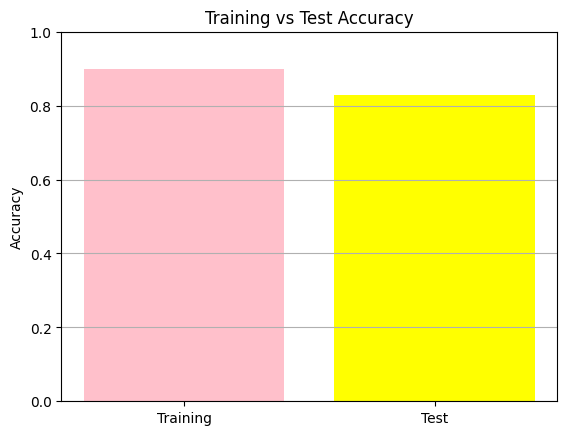

In [22]:
import matplotlib.pyplot as plt

plt.bar(["Training", "Test"], [train_accuracy, test_accuracy], color=["pink", "yellow"])
plt.title("Training vs Test Accuracy")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.show()


# Confusion matrix

Visualizing how classes are confused by the model

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm_df = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)

# Plot
plt.figure(figsize=(15, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Clustering

Clustering is **unsupervised learning** — we don't provide labels. We let the model group similar items based on their TF-IDF vectors.

We use:
- **KMeans**: Standard clustering algorithm. We set `n_clusters=5` to force 5 groups.
- **PCA**: Principal Component Analysis reduces high-dimensional vectors to 2D for visualization.

`.fit_predict()`
- `.fit_predict()` fits the KMeans model and returns the cluster each item belongs to.


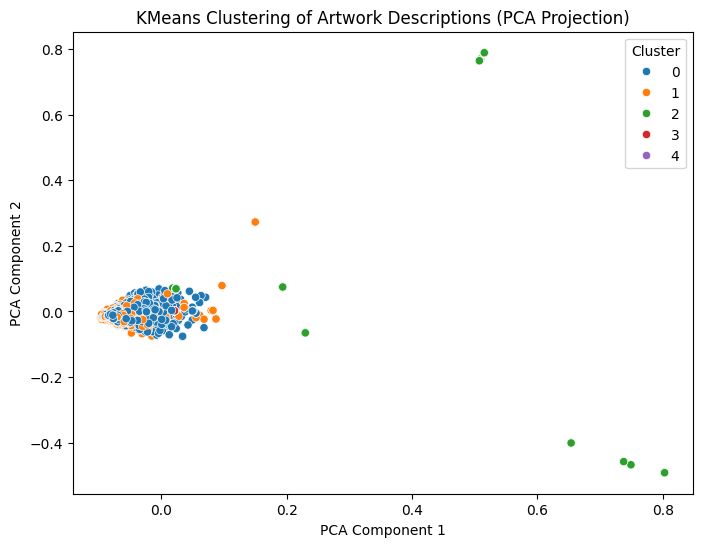

In [26]:
# Run KMeans clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X)

# Reduce dimensionality for plotting
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())  # Convert sparse to dense for PCA

# Build a DataFrame for plotting
df_plot = pd.DataFrame({
    "x": X_reduced[:, 0],
    "y": X_reduced[:, 1],
    "cluster": clusters
})

# Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_plot, x="x", y="y", hue="cluster", palette="tab10")
plt.title("KMeans Clustering of Artwork Descriptions (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [27]:
df_clustered = df_filt15k[filter_mask].copy()
df_clustered["cluster"] = clusters

In [28]:
for i in range(kmeans.n_clusters):
    print(f"\nCluster {i} — {df_clustered[df_clustered['cluster'] == i].shape[0]} artworks")
    #print(df_clustered[df_clustered["cluster"] == i][["title", "type", "clean_description"]].head(5))


Cluster 0 — 7395 artworks

Cluster 1 — 5025 artworks

Cluster 2 — 1746 artworks

Cluster 3 — 350 artworks

Cluster 4 — 227 artworks


In [29]:
df_clustered[df_clustered["cluster"] == 3]["description"]

,description
4075,"This sketchbook contains 69 pages of drawings,..."
4076,"This sketchbook contains 69 pages of drawings,..."
4077,"This sketchbook contains 69 pages of drawings,..."
4078,"This sketchbook contains 69 pages of drawings,..."
4079,"This sketchbook contains 69 pages of drawings,..."
...,...
14918,Which is more useful to humanity: fact or myth...
14919,Which is more useful to humanity: fact or myth...
14920,Which is more useful to humanity: fact or myth...
14921,Which is more useful to humanity: fact or myth...


More machine learning? look at the sklearn library docs: https://scikit-learn.org/stable/

# Machine Learning on the visual aspects


We’ll use a combination of libraries:

- **Pandas**: for data handling
- **NumPy**: for matrix operations
- **Matplotlib**: for visualizations
- **Requests**: to fetch images from URLs
- **PIL (Pillow)**: to handle image loading and resizing
- **TensorFlow / Keras**: to use pre-trained convolutional neural networks (CNNs)
- **Scikit-learn (sklearn)**: for clustering (KMeans) and dimensionality reduction (t-SNE)

### What is a Convolutional Neural Network (CNN)?
A Convolutional Neural Network (CNN) is a type of deep neural network specialized for processing image data. Unlike standard (fully connected) networks, CNNs use convolutional layers that slide small filters over the input image to detect spatial patterns like edges, textures, shapes, and objects.

### Keras
Keras is a high-level API for building and training deep learning models. It’s part of the TensorFlow ecosystem.
It's used to easily define layers, losses, optimizers, and metrics; load pre-trained models from large public datasets (e.g., ImageNet); train and evaluate models on your own data.

We use Keras because:

It simplifies complex model building.

It integrates with TensorFlow in python.

It provides many tools for transfer learning (like MobileNetV2, VGG16, etc.).

### pre trained model

A pre-trained model is a neural network that has already been trained on a large dataset — typically ImageNet (which contains over 14 million images across 1000 categories).

Instead of training a CNN from scratch (which requires a lot of data and time), we reuse the early layers of a pre-trained model to extract general-purpose features. This process is known as transfer learning.

Two ways we use pre-trained models:

1.   Feature Extraction: Freeze all layers and use them as-is
2.   Fine-Tuning: Unfreeze some layers and retrain on a smaller dataset to specialize the model for a new task.

#### models in keras

A model in Keras is the full computational pipeline: from input to output.

It consists of layers: Convolutional → Pooling → Dense, etc.

It must be compiled with a loss function and an optimizer.

It can be trained using `.fit()`, evaluated using `.evaluate()`, and used for prediction using `.predict()`.

In our case:

The input will be an image tensor (224, 224, 3) (dimension1, dimension2, RGB) this is how many models are pretrained, so we will need to turn our images into this format, just like we turned the texts into tfidf.

The output will be a softmax probability distribution over our chosen category.




## Filtering Images

We’ll use the `"image_web"` field from the Cleveland dataset, which contains direct URLs to artwork images.

Steps:
1. Filter the dataset to only entries with valid image URLs
2. Sample a subset (e.g. 500–1000) to keep runtime reasonable on Colab

In [30]:
df_filt15k = df_filt15k.dropna(subset=["image_web"])
df_filt15k10 = df_filt15k.sample(n=500, random_state=42)

## Download and preprocess images

Each image will be:
- Downloaded via `requests`
- Resized to 224×224 (required input size for VGG16)
- Converted to a NumPy array (vector)
- Normalized using `preprocess_input()` from `keras.applications.vgg16` (because this is a pretrained model, we need to fit our dataset with the preprocess created for this model!)

We skip any failed downloads or unreadable images.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

def load_and_preprocess_image(url):
    try:
        response = requests.get(url, timeout=5)
        img = Image.open(BytesIO(response.content)).convert("RGB")
        img = img.resize((224, 224))
        arr = img_to_array(img)
        arr = preprocess_input(arr)  # Normalize with VGG16 preprocessing
        return arr
    except:
        return None

images = []
valid_indices = []

for idx, url in tqdm(enumerate(df_filt15k10["image_web"])):
    img = load_and_preprocess_image(url)
    if img is not None:
        images.append(img)
        valid_indices.append(idx)

images = np.array(images)
df_filt15k10 = df_filt15k10.iloc[valid_indices].reset_index(drop=True)


500it [06:36,  1.26it/s]


In [32]:
len(images)

476

In [33]:
import pickle

with open('images.pickle', 'wb') as handle:
    pickle.dump(images, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [34]:
with open('images.pickle', 'rb') as handle:
    images = pickle.load(handle)

In [ ]:
## The file was too big for github: https://gigamove.rwth-aachen.de/en/download/373880ad2e3f1d7ff454a8826540ad27/password

# Feature Extraction with VGG16

We use a **pre-trained VGG16 model** from Keras:
- Trained on ImageNet (over 1 million images)
- We exclude the top classification layers (`include_top=False`)
- Output: a 7×7×512 feature map per image

We then flatten these into 1D feature vectors.

### Why is the VGG16 Output Shape `(n_images, 7, 7, 512)`?

When we pass images through the **VGG16** model (with `include_top=False`), we get feature maps with shape:
(n_images, 7, 7, 512)

Remember, input is
- `224 x 224` = width and height of the image in pixels
- `3` = number of color channels (RGB)

---

#### Architecture of VGG16

VGG16 has 13 convolutional layers organized into 5 blocks. Each block ends with a **MaxPooling layer** that reduces the spatial size (width and height) by half.

Here’s how the image dimensions change as it goes through the network:

| Block | Layers                        | Output Shape         |
|-------|-------------------------------|----------------------|
| 1     | Conv → Conv → MaxPool         | (112, 112, 64)       |
| 2     | Conv → Conv → MaxPool         | (56, 56, 128)        |
| 3     | Conv → Conv → Conv → MaxPool  | (28, 28, 256)        |
| 4     | Conv → Conv → Conv → MaxPool  | (14, 14, 512)        |
| 5     | Conv → Conv → Conv → MaxPool  | (7, 7, 512)          |

Each `MaxPool` operation halves the width and height.

---

#### Final Output

After Block 5, the final feature map has the shape:
- `7 x 7` = spatial dimensions (small version of original image)
- `512` = number of learned filters (pattern detectors)

So for a batch of `n_images`, the total output shape is:
25088  **because 7 * 7 * 512 = 25088**

Each image will be now represented as a 25,088-dimensional feature vector that encodes high-level visual information learned from ImageNet.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load the model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features
features = base_model.predict(images)  # Output shape: (n_images, 7, 7, 512)
features_flat = features.reshape(features.shape[0], -1)  # Flatten: shape (n_images, 25088)

# Clustering with KMeans

We cluster images based on their visual features:
- `n_clusters=5` group images into 5 visual categories
- `.fit_predict()` both fits the model and assigns each image to a cluster

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(features_flat)

df_filt15k10["cluster"] = clusters

## t-SNE Visualization

To visualize clusters in 2D, we use **t-SNE** (t-distributed stochastic neighbor embedding), a dimensionality reduction technique that preserves local structure.

We project each image’s 25,088-dimensional feature vector to 2D.

We also use the parameter **Perplexity**

---

### Perplexity

Perplexity controls the balance between local and global structure in the data when projecting it to 2D.

A lower perplexity (e.g. 5–10) focuses more on very local structure, meaning small neighborhoods

A higher perplexity (e.g. 40–50) preserves broader patterns, meaning more global relationships

perplexity=30 is a common default that balances both.

---

Then, we plot each image as a colored point according to its cluster. Optionally, you can overlay image thumbnails in place of points (see advanced versions).

This **SHOULD help** us visually interpret the kinds of images that group together.

In [35]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
coords = tsne.fit_transform(features_flat)

df_filt15k10["x"] = coords[:, 0]
df_filt15k10["y"] = coords[:, 1]

import plotly.express as px

df_filt15k10["hover_text"] = df_filt15k10.apply(
    lambda row: f"Title: {row['title']}<br>Cluster: {row['cluster']}", axis=1
)

# Build the interactive scatter plot
fig = px.scatter(
    df_filt15k10,
    x="x", y="y",
    color="cluster",
    hover_name="hover_text",
    hover_data={"x": False, "y": False, "cluster": False},
    title="Artwork Clusters (t-SNE + VGG16 Features)",
    width=950,
    height=750
)

# Clean hover template — show only custom hover text, no extra info
fig.update_traces(hovertemplate="%{hovertext}<extra></extra>")

# Show plot
fig.show()




NameError: name 'features_flat' is not defined

# Inspect Images by Cluster

We can now examine representative samples from each cluster to understand what visual themes/patterns are emerging.


In [ ]:
from IPython.display import display, Image, HTML

for cluster_id in sorted(df_filt15k10["cluster"].unique()):
    print(f"\n### Cluster {cluster_id} samples:\n")

    # Get the first 3 items from this cluster
    cluster_subset = df_filt15k10[df_filt15k10["cluster"] == cluster_id].head(3)

    for _, row in cluster_subset.iterrows():
        print(f"Title: {row['title']}")
        print(f"Type: {row['type']}")
        display(Image(url=row['image_web'], width=200))
        print("\n" + "*"*50)


## Fine-tuning and image classifiers!

We’ll build and train a deep learning model to **classify artworks based on their image using transfer learning.**

We will use the MobileNetV2 as a base. We will prepare images again according to the new model, and we will fine tune it to predict the type again,we will then evaluate the model performance so we can compare visual and textual results. (Just know, that for text we used 15000 description, and we are only using 450 images because otherwise it would take too long!)



In [36]:

target_col = "type"

# Only keep top 10 frequent labels for balance and feasibility, because we
# do not have a lot of images (compared to the texts we had)
top_labels = df_filt15k10[target_col].value_counts().head(10).index.tolist()
df_classify = df_filt15k10[df_filt15k10[target_col].isin(top_labels)].copy()

print("Classes:", top_labels)
print("Number of images:", len(df_classify))

Classes: ['Painting', 'Bound Volume', 'Print', 'Sculpture', 'Ceramic', 'Textile', 'Manuscript', 'Drawing', 'Metalwork', 'Coins']
Number of images: 397


We’ll use Keras’ `ImageDataGenerator` to:

Load images directly from URLs again

Resize them to (224, 224) again

Apply preprocessing compatible with MobileNetV2

In [37]:
import numpy as np
from PIL import Image
import requests
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load images and labels
images, labels = [], []

for _, row in df_classify.iterrows():
    try:
        response = requests.get(row["image_web"], timeout=5)
        img = Image.open(BytesIO(response.content)).convert("RGB")
        img = img.resize((224, 224))
        arr = np.array(img)
        arr = preprocess_input(arr)  # MobileNetV2 preprocessing
        images.append(arr)
        labels.append(row[target_col])
    except:
        continue

images = np.array(images)
labels = np.array(labels)
print(len(images))

397


In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode labels as integers
le = LabelEncoder()
y_encoded = le.fit_transform(labels)
y_cat = to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    images, y_cat, test_size=0.2, stratify=y_cat, random_state=42
)

print("Train samples:", len(X_train))
print("Test samples:", len(X_test))
print("Classes:", le.classes_)


Train samples: 317
Test samples: 80
Classes: ['Bound Volume' 'Ceramic' 'Coins' 'Drawing' 'Manuscript' 'Metalwork'
 'Painting' 'Print' 'Sculpture' 'Textile']


In [42]:
# BUILDING THE MODEL!!!

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# Load base model
base_model = MobileNetV2(include_top=False, input_shape=(224, 224, 3), weights="imagenet")

# Freeze base layers (initial training)
for layer in base_model.layers:
    layer.trainable = False

# Add classification head
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(y_cat.shape[1], activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

# why is dense (Dense)-> (None, 10) here?

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [43]:
# First stage of training!!! with frozen base
# low error rates and a high variance are good indicators of overfitting
# val -> validation, interpret the result matrix

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.1545 - loss: 2.4289 - val_accuracy: 0.4375 - val_loss: 1.7148
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.4816 - loss: 1.4780 - val_accuracy: 0.6000 - val_loss: 1.3206
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6683 - loss: 1.0132 - val_accuracy: 0.6250 - val_loss: 1.1085
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8109 - loss: 0.7174 - val_accuracy: 0.6625 - val_loss: 1.0094
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8574 - loss: 0.5703 - val_accuracy: 0.6625 - val_loss: 0.9472


In [45]:
# Fine tuning! Unfreezing the layers
for layer in base_model.layers:
    layer.trainable = True

# Recompile (lower learning rate helps prevent overfitting)
model.compile(optimizer=Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=["accuracy"])

# Fine-tune
history_fine = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 109s 7s/step - accuracy: 0.7302 - loss: 0.8899 - val_accuracy: 0.6875 - val_loss: 0.8762
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 77s 7s/step - accuracy: 0.7340 - loss: 0.8718 - val_accuracy: 0.6750 - val_loss: 0.8611
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 83s 7s/step - accuracy: 0.8204 - loss: 0.6703 - val_accuracy: 0.6750 - val_loss: 0.8496
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 83s 7s/step - accuracy: 0.8435 - loss: 0.5639 - val_accuracy: 0.6875 - val_loss: 0.8375
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 7s/step - accuracy: 0.9209 - loss: 0.4470 - val_accuracy: 0.7125 - val_loss: 0.8259


In [46]:
# Get the classification report

from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get model predictions (one-hot to class index)
y_pred = model.predict(X_test)
y_pred_labels = le.inverse_transform(np.argmax(y_pred, axis=1))
y_true_labels = le.inverse_transform(np.argmax(y_test, axis=1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


In [47]:
# Print a standard precision/recall/F1 report
print(classification_report(y_true_labels, y_pred_labels))

              precision    recall  f1-score   support

Bound Volume       0.79      0.92      0.85        12
     Ceramic       0.75      0.75      0.75         8
       Coins       0.50      0.50      0.50         2
     Drawing       0.67      0.40      0.50         5
  Manuscript       1.00      0.80      0.89         5
   Metalwork       1.00      0.50      0.67         4
    Painting       0.71      0.62      0.67        16
       Print       0.64      0.64      0.64        11
   Sculpture       0.67      0.91      0.77        11
     Textile       0.57      0.67      0.62         6

    accuracy                           0.71        80
   macro avg       0.73      0.67      0.68        80
weighted avg       0.72      0.71      0.71        80



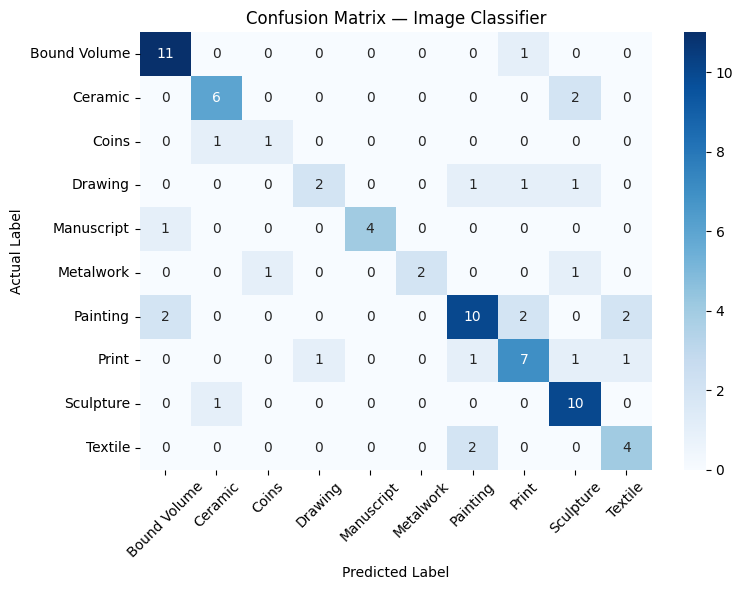

In [48]:
# Create confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels, labels=le.classes_)
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Image Classifier")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Saving a model

model.save("image_classifier_model.h5")
# model.save("image_classifier_model.keras")  # TensorFlow 2.11+

# Saving the encoder

import pickle

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [ ]:
# Reloading a model

from tensorflow.keras.models import load_model

model = load_model("image_classifier_model.h5")

# Reloading the encoder

import pickle

with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

# PRedict on new image

# Load, preprocess, and predict
img = Image.open("path_or_url_to_image").convert("RGB").resize((224, 224))
arr = preprocess_input(np.expand_dims(np.array(img), axis=0))

pred = model.predict(arr)
predicted_class = le.inverse_transform([np.argmax(pred)])
print("Predicted type:", predicted_class[0])

### Exercise, train two models, one for text and one for images, to classify images on the "culture" tag

**Help**, maybe it's better to clean the culture tag and take only the first part

In [ ]:
print(len(set(df_filt15k["culture"])))

In [ ]:
def clean_culture(text):
    text = text.lower()
    text = text.split(",")[0]
    text = re.sub(r"[^\w\s]", "", text) # regex to remove non alphanumeric ch
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df_filt15k["clean_culture"] = df_filt15k["culture"].apply(clean_culture)

In [41]:
print(len(set(df_filt15k["clean_culture"])))

KeyError: 'clean_culture'

In [39]:
# Step 1: take the top 30 cultures and make a dataframe filtered with those
# Step 2: train a text classifier to assign cultures to artworks based on
# the cleaned descriptions
# Step 3: make a classification report on it and a confusion matrix
# Step 4: extract a subset of images from the df (around 500) and fit them
# to a model for image classification
# Step 5: fine tune MobileNetV2 to assign cultures to artworks based on image
# features
# Step 6: make a classification report on it and a confusion matrix